<a href="https://colab.research.google.com/github/gunjanak/Pytorch_Course/blob/main/3_Mushroom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import data

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
type(X)

pandas.core.frame.DataFrame

In [4]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [6]:
# Use value_counts() to count unique values
unique_value_counts = y.value_counts()

In [7]:
unique_value_counts

poisonous
e            4208
p            3916
dtype: int64

In [8]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
len(X)

8124

In [10]:
X = X[['cap-color','cap-shape','cap-surface','habitat']]

In [11]:
X.head()

,cap-color,cap-shape,cap-surface,habitat
0,n,x,s,u
1,y,x,s,g
2,w,b,s,m
3,w,x,y,u
4,g,x,s,g


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
# Use LabelEncoder to convert the target variable to numerical format
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [15]:
# One-hot encode the categorical features
X_encoded = pd.get_dummies(X)

In [16]:
X_encoded.head()

,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,...,cap-surface_g,cap-surface_s,cap-surface_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

#Model

In [19]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(27,8)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(8,8)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(8,1)

    #define activation function to ouput layer
    self.output_layer_activation = nn.Sigmoid()

  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    x = self.output_layer_activation(x)
    return x

In [20]:
# Instantiate the model
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

epoch_accuracy = []
epoch_loss = []

#Training

In [21]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Calculate accuracy
    predictions = (outputs >= 0.5).float()  # Threshold at 0.5 for binary classification
    correct_predictions = (predictions == y_train_tensor).sum().item()
    accuracy = correct_predictions / len(y_train_tensor)


    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    loss = loss.detach().numpy()
    # print(type(loss))
    epoch_loss.append(loss)
    epoch_accuracy.append(accuracy)
    # Print training loss every 10 epochs
    if (epoch+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Epoch [100/1000], Loss: 0.6906, Accuracy: 0.5178
Epoch [200/1000], Loss: 0.6840, Accuracy: 0.5893
Epoch [300/1000], Loss: 0.6559, Accuracy: 0.7087
Epoch [400/1000], Loss: 0.5861, Accuracy: 0.7446
Epoch [500/1000], Loss: 0.5433, Accuracy: 0.7667
Epoch [600/1000], Loss: 0.5161, Accuracy: 0.7818
Epoch [700/1000], Loss: 0.4921, Accuracy: 0.7964
Epoch [800/1000], Loss: 0.4701, Accuracy: 0.8070
Epoch [900/1000], Loss: 0.4501, Accuracy: 0.8167
Epoch [1000/1000], Loss: 0.4325, Accuracy: 0.8321


#Plots

In [22]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt

3.7.1


Text(0, 0.5, 'Loss Values')

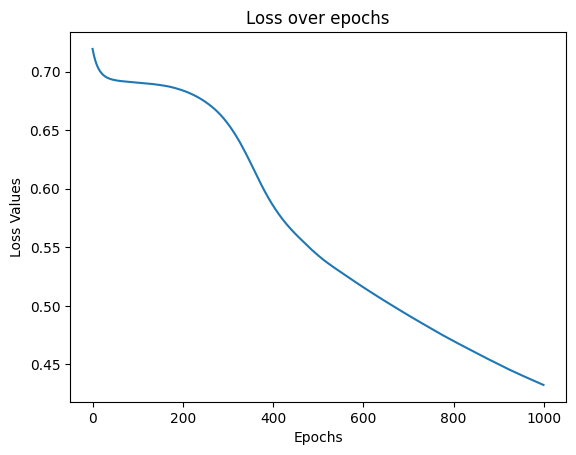

In [23]:
plt.plot(epoch_loss)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

Text(0, 0.5, 'Accuracy Values')

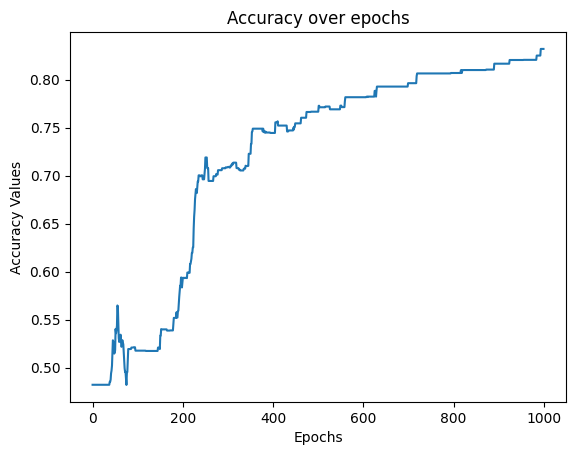

In [24]:
plt.plot(epoch_accuracy)
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Values")

#Evaluation on test data

In [25]:
# After training, you can use the model for predictions
# Assuming X_test is your test data
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    predictions_binary = (predictions >= 0.5).float()  # Threshold at 0.5 for binary classification

# Convert predictions_binary tensor to a NumPy array
predictions_np = predictions_binary.numpy()

# Now, predictions_np contains the predicted classes (0 or 1) for your test data

#Metrices

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [27]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_np)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[725 118]
 [196 586]]


In [28]:
import seaborn as sns

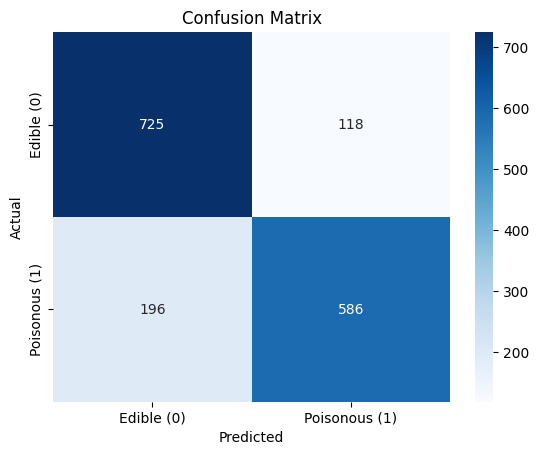

In [29]:
# Plot confusion matrix using seaborn
class_labels = ['Edible (0)', 'Poisonous (1)']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[Precision Recall and F1-Score](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec)

In [30]:
# Calculate other evaluation metrics
accuracy = accuracy_score(y_test, predictions_np)
precision = precision_score(y_test, predictions_np)
recall = recall_score(y_test, predictions_np)
f1 = f1_score(y_test, predictions_np)

In [31]:
# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[725 118]
 [196 586]]

Accuracy: 0.8067692307692308
Precision: 0.8323863636363636
Recall: 0.7493606138107417
F1 Score: 0.7886944818304172
